In [1]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass

In [4]:
#Training inputs for RGBcolors
rgb_colors = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]

In [5]:
color_names = \
    ['black', 'blue', 'darkblue', 'skyblue',
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey']

In [6]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [7]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [8]:
# Network configuration

data = rgb_colors
batch_size = 4

length = 10
width = 10
number_iterations = 1

move_closer_coef = 0

In [9]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    dim = len(data[0])
    number_rows_data = len(data)
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader, dim, number_rows_data

In [10]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [11]:
def large_cycle_rgb(map_, training_data):
    visualize_rgb(map_)
#     print(map_display(map_.map))
    for i in range(number_iterations):
        map_.cycle(training_data)
    visualize_rgb(map_)
#     print(map_display(map_.map))

In [12]:
def visualize_rgb(map_):
    print("trying to visualize map")
    tens_try = map_.weights.view(length, width, 3)
    plt.imshow(tens_try)

    classification = map_.classify_all(map_.convert_data_tensor(data))
    for i in range(len(classification)):
        loc_tuple = map_.get_location(classification[i])
        plt.text(loc_tuple[1], loc_tuple[0], color_names[i], ha='center', va='center',
        bbox=dict(facecolor='white', alpha=0.5, lw=0))

# plt.text(0, 1, color_names[1], ha='center', va='center',
#          bbox=dict(facecolor='white', alpha=0.5, lw=0))
    plt.show()

In [13]:
training, dim, number_rows_data = load_data(data)

In [14]:
map1 = MapClass(length, width, dim, move_closer_coef, number_iterations)

trying to visualize map


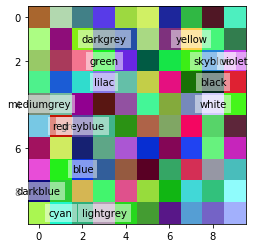

trying to visualize map


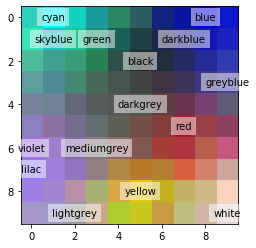

In [15]:
large_cycle_rgb(map1, training)

In [16]:
map1.weights

tensor([[0.1743, 0.8230, 0.7399],
        [0.0178, 0.9673, 0.9697],
        [0.0717, 0.8206, 0.7524],
        [0.1123, 0.6086, 0.6246],
        [0.1684, 0.5328, 0.3827],
        [0.1830, 0.3657, 0.3814],
        [0.0676, 0.1407, 0.4804],
        [0.0484, 0.0855, 0.6250],
        [0.0078, 0.0128, 0.8392],
        [0.0601, 0.0920, 0.8123],
        [0.2290, 0.8942, 0.7357],
        [0.1349, 0.7601, 0.7498],
        [0.1322, 0.7810, 0.5788],
        [0.1143, 0.5842, 0.4399],
        [0.1086, 0.3765, 0.3392],
        [0.1283, 0.2550, 0.2659],
        [0.1111, 0.1491, 0.3271],
        [0.1024, 0.1193, 0.5008],
        [0.0742, 0.0925, 0.6829],
        [0.1086, 0.1363, 0.7498],
        [0.3090, 0.7336, 0.6115],
        [0.2543, 0.6340, 0.5711],
        [0.2261, 0.6130, 0.4749],
        [0.1654, 0.5063, 0.3309],
        [0.1774, 0.3143, 0.2864],
        [0.1247, 0.1703, 0.1727],
        [0.1332, 0.1850, 0.2394],
        [0.1470, 0.1709, 0.4043],
        [0.1521, 0.1735, 0.5943],
        [0.189

In [17]:
map1.cycle(training)

In [18]:
map1.distance_matrix

tensor([[ 0.0000,  1.0000,  2.0000,  ..., 11.4018, 12.0416, 12.7279],
        [ 1.0000,  0.0000,  1.0000,  ..., 10.8167, 11.4018, 12.0416],
        [ 2.0000,  1.0000,  0.0000,  ..., 10.2956, 10.8167, 11.4018],
        ...,
        [11.4018, 10.8167, 10.2956,  ...,  0.0000,  1.0000,  2.0000],
        [12.0416, 11.4018, 10.8167,  ...,  1.0000,  0.0000,  1.0000],
        [12.7279, 12.0416, 11.4018,  ...,  2.0000,  1.0000,  0.0000]])

In [19]:
map1.impact_matrix

tensor([[1.0000e+00, 6.8916e-01, 4.2371e-01,  ..., 5.1260e-06, 1.4901e-06,
         3.5763e-07],
        [6.8916e-01, 1.0000e+00, 6.8916e-01,  ..., 1.5140e-05, 5.1260e-06,
         1.4901e-06],
        [4.2371e-01, 6.8916e-01, 1.0000e+00,  ..., 3.8207e-05, 1.5140e-05,
         5.1260e-06],
        ...,
        [5.1260e-06, 1.5140e-05, 3.8207e-05,  ..., 1.0000e+00, 6.8916e-01,
         4.2371e-01],
        [1.4901e-06, 5.1260e-06, 1.5140e-05,  ..., 6.8916e-01, 1.0000e+00,
         6.8916e-01],
        [3.5763e-07, 1.4901e-06, 5.1260e-06,  ..., 4.2371e-01, 6.8916e-01,
         1.0000e+00]])

In [20]:
visualize_rgb(map1.weights)

trying to visualize map


AttributeError: 'Tensor' object has no attribute 'weights'

In [ ]:

classification

In [ ]:
tens_try = map1.weights.view(length, width, 3)
plt.imshow(tens_try)

classification = map1.classify_all(map1.convert_data_tensor(data))
for i in range(len(classification)):
    loc_tuple = map1.get_location(classification[i])
    plt.text(loc_tuple[1], loc_tuple[0], color_names[i], ha='center', va='center',
         bbox=dict(facecolor='white', alpha=0.5, lw=0))
z
# plt.text(0, 1, color_names[1], ha='center', va='center',
#          bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.show()

In [ ]:
visualize_rgb(map1)